In [1]:
import numpy as np
import pandas as pd
import random
random.seed(0)
%matplotlib inline

In [4]:
def load_data_from_file(file_name="advertising.csv"):
  data = np.genfromtxt("../data/" + file_name, delimiter=",", skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]
  features_X = np.insert(features_X, 0, 1, axis=1)
  return features_X, sales_Y

In [5]:
features_X, _ = load_data_from_file()
print(features_X[:5, :])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [4]:
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


# 1. Khai báo các tham số cần thiết:

In [5]:
n = 4
m = sales_Y.shape[0]
n_generations = 100
losses = []

# 2. Khởi tạo các hàm tính toán cần thiết

In [6]:
def compute_loss(individual):
  theta = np.array(individual)
  y_hat = features_X.dot(theta)
  #loss = np.mean((y_hat - sales_Y)**2)
  loss = np.multiply((y_hat - sales_Y), (y_hat - sales_Y)).mean()
  return loss

In [7]:
# tính fitness values của một chromosome bằng cách nghịch đảo
# giá trị của hàm loss theo công thức fitness = 1 / (loss + 1).

def compute_fitness(individual):
  loss = compute_loss(individual)
  fitness_value = 1 / (loss + 1)
  return fitness_value

individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [8]:
# khởi tạo ngẫu nhiên giá trị của n genes (tham số θi) trong chromosome
# với giá trị từng gene được khởi tạo [-bound/2, bound/2]
def create_individual(n=4, bound=10):
  individual = np.random.uniform(-bound/2, bound/2, n)
  return individual

individual = create_individual()
print(individual)

[ 0.59680801 -1.24173509  2.65966952  1.62779657]


In [9]:
def crossover(individual1, individual2, crossover_rate=0.9):
  individual1_new = individual1.copy()
  individual2_new = individual2.copy()
  for i in range(n):
    if random.random() < crossover_rate:
      individual1_new[i] = individual2[i]
      individual2_new[i] = individual1[i]

  return individual1_new, individual2_new

In [ ]:
def crossover_solution(sol1, sol2):
  offsprings = np.array([[sol1[0], sol2[1]]])
  offsprings = np.vstack((offsprings, [[sol2[0], sol1[1]]]))
  return offsprings

In [10]:
# question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print(individual1)
print(individual2) # D

[3.44, 2.57, -0.79, -2.41]
[4.09, 4.82, 3.1, 4.02]


In [11]:
# đột biến cho một cá thể với tỉ lệ đột biến là mutation_rate.
def mutate(individual, mutation_rate=0.5):
  individual_m = individual.copy()
  for i in range(n):
    if random.random() < mutation_rate:
      individual_m[i] = random.uniform(-10, 10)
  return individual_m

In [ ]:
def mutate_solution(sol):
  mutationProb = 0.15
  if np.random.rand() < mutationProb:
    sol = sol + (((np.random.rand(2)*2) - 1) * 0.1)
  return sol

In [16]:
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(before_individual)
print(before_individual == after_individual)
print(before_individual)
print(after_individual)

False
[4.09, 4.82, 3.1, 4.02]
[4.09, 4.82, 5.116084083144479, 4.02]


In [13]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [14]:
# chọn lọc tự nhiên cá thể tốt vào thế hệ kế tiếp.
def selection(sorted_old_population, m = 100):
  index1 = random.randint(0, m-1)
  while True:
    index2 = random.randint(0, m-1)
    if index2 != index1:
      break
  individual_s = sorted_old_population[index1]
  if index2 > index1:
    individual_s = sorted_old_population[index2]
  return individual_s

In [15]:
def selection_solution(solutions, m = 20):
  fitnesses = np.apply_along_axis(fitness, 1, solutions)
  return solutions[np.argsort(fitnesses, axis=0)[:m], :]

In [23]:
# tạo ra quần thể mới đựa trên các bước selection, crossover và mutation. Lưu ý rằng chúng ta sẽ sử
# dụng giải thuât Elitist algorithms để đảm bảo rằng elitism cá thể tốt nhất không bị loại bỏ, bằng cách
# chuyển chúng trực tiếp sang thế hệ tiếp theo.
def create_new_population(old_population, elitism=2, gen=1):
  m = len(old_population)
  sorted_population = sorted(old_population, key=compute_fitness)

  if gen % 1 == 0:
    print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

  new_population = []
  while len(new_population) < m-elitism:
    # selection
    individual1 = selection(sorted_population)
    individual2 = selection(sorted_population)

    # crossover
    individual1, individual2 = crossover(individual1, individual2)

    # mutation
    individual1 = mutate(individual1)
    individual2 = mutate(individual2)

    new_population.append(individual1)
    new_population.append(individual2)

    # copy elitism chromosomes that have best fitness score to the next generation
    # for ind in sorted_population[m-elitism]
    new_population.extend(sorted_population[:elitism])

  return new_population, compute_loss(sorted_population[m-1])

In [24]:
individual1 = [4.09 , 4.82 , 3.10 , 4.02]
individual2 = [3.44 , 2.57 , -0.79 , -2.41]
old_population = [individual1, individual2]
new_population , _ = create_new_population(old_population, elitism =2, gen=1) # A

Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


# 3. Thực hiện huấn luyện:

In [25]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  for gen in range(n_generations):
    population, loss = create_new_population(population, elitism=2, gen=gen)
    losses.append(loss)
  return losses

Best loss: 1190.4463228906925 with chromsome:  [2.34683268e+00 2.48704236e-01 2.67198054e-01 4.69887201e-04]
Best loss: 211.1114979902407 with chromsome:  [-7.73666273  0.08174146  0.83775379 -0.50982266]
Best loss: 6053.173518108991 with chromsome:  [-2.42125262  0.02983707  0.68653547  1.95706469]
Best loss: 3534.830032820683 with chromsome:  [-0.52154436  0.57482795 -1.52605055 -1.24430919]
Best loss: 4675.73325845996 with chromsome:  [-0.73607548  0.00857358  3.27458005 -2.85622718]
Best loss: 37713.14607481822 with chromsome:  [-5.82840907 -1.59712016  1.01409105  5.59483812]
Best loss: 6022.381151432044 with chromsome:  [-2.52737961  0.59556742 -0.51537171  0.12956016]
Best loss: 13676.301989923459 with chromsome:  [-8.28648036  0.81992755  2.94008428 -2.98885053]
Best loss: 29435.541045268816 with chromsome:  [ 2.13395352 -0.64511687 -6.51070203  7.64656745]
Best loss: 29969.158432709126 with chromsome:  [-5.37145285  1.20560671 -1.7912101  -5.6842979 ]
Best loss: 23944.75994585

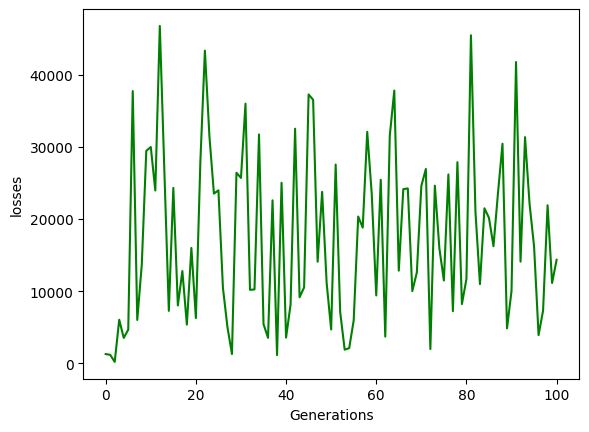

In [26]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
  plt.plot(losses_list, c='green')
  plt.xlabel('Generations')
  plt.ylabel('losses')
  plt.show()

losses_list = run_GA()
visualize_loss(losses_list)